從test移動過來

In [314]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import time

#先抓PTT
items=['title','url','date','push']

df_ptt = pd.DataFrame(columns=items)

url="https://www.ptt.cc/bbs/Stock/index.html"
''' 
def get_article_content(article_url):
    r = requests.get(article_url)
    soup = BeautifulSoup(r.text, "lxml")
    results = soup.select('span.article-meta-value')
    if results:
        print('作者:', results[0].text)
        print('看板:', results[1].text)
        print('標題:', results[2].text)
        print('時間:', results[3].text)
''' 

def get_all_href(url):     #抓第一頁，index這頁的資料
    global df_ptt
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html.parser")
    results = soup.select("div.title")
    for item in results:
        a_item = item.select_one("a")
        title = item.text.strip()
        if a_item:
            #print(title, 'https://www.ptt.cc'+ a_item.get('href'))
            link=str('https://www.ptt.cc'+ a_item.get('href'))
            a=[title,link]
            #print(a)
            #df_ptt=df_ptt.append({'title':a[0], 'url':a[1]}, ignore_index=True)
            #m=len(df_ptt)  #計算當下row數量
            r2 = requests.get(link)
            soup2 = BeautifulSoup(r2.text, "lxml")
            results2 = soup2.select('span.article-meta-value')
            if len(list(results2))>3:   #為何要判斷result2的個數呢? 因為發現PTT有的文章頁面，瀏覽器的html不太一樣，不是全部的標題跟時間都一定能抓到。
                df_ptt=df_ptt.append({'title':a[0], 'url':a[1],'date':results2[3].text}, ignore_index=True)


    
            

        
for page in range(0,20):   #往後抓r次，抓"上頁"
    r = requests.get(url)
    soup = BeautifulSoup(r.text,"html.parser")
    btn = soup.select('div.btn-group > a')
    up_page_href = btn[3]['href']
    next_page_url = 'https://www.ptt.cc' + up_page_href
    url = next_page_url
    get_all_href(url = url)
    time.sleep(3)
    print(page)
    

df_ptt['date']=pd.to_datetime(df_ptt['date'],format="%c") #將日期字串轉成datetime


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [315]:
t=len(df_ptt['title'])
for i in range(t):
    a= df_ptt['title'][i].find("]")+1
    df_ptt['title'][i]=df_ptt['title'][i][a:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [316]:
#抓鉅亨網
site_url = 'https://news.cnyes.com'
#先抓全球
url = site_url + '/news/cat/wd_stock'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'lxml')

In [317]:
div_tags = soup.select('div.theme-list div')

title_list = []
link_list = []
sub_category_list = []
datetime_list = []

for news in div_tags:
    
    if not news.a:
        continue
        
    title = news.a.get('title')
    link = site_url + news.a.get('href')
    sub_category = news.select_one('div.theme-sub-cat').text
    datetime = news.select_one('time').text
    
    print(title)
    print(link)
    print(sub_category)
    print(datetime)
    
    print('-'*20)
    
    title_list.append(title)
    link_list.append(link)
    sub_category_list.append(sub_category)
    datetime_list.append(datetime)

英國7月零售銷售額月增3.6% 回升至疫情前水平
https://news.cnyes.com/news/id/4517828
國際政經
16:35
--------------------
美國銀行：輝達有望成為首家市值5000億美元的半導體公司
https://news.cnyes.com/news/id/4517802
美股
16:00
--------------------
拜登接受民主黨提名 稱要終結川普帶來的「黑暗時刻」
https://news.cnyes.com/news/id/4517841
國際政經
15:45
--------------------
看好聲聯網潛力 龍寶集團入股獨步新媒體
https://news.cnyes.com/news/id/4517820
美股
15:31
--------------------
英國政府債務首度突破2兆英鎊 財政支出添增壓力
https://news.cnyes.com/news/id/4517826
國際政經
15:20
--------------------
日本立邦塗料將成新加坡吳德南集團子公司 股價衝高
https://news.cnyes.com/news/id/4517809
歐亞股
15:10
--------------------
全球招募6萬人受試！嬌生候選疫苗9月起進入最後試驗階段
https://news.cnyes.com/news/id/4517664
美股
15:00
--------------------
走出4月份低迷行情 美國二手車價格8月飆至歷史新高
https://news.cnyes.com/news/id/4517750
國際政經
14:50
--------------------
南韓8月前20日出口年減7% 跌幅有所趨緩
https://news.cnyes.com/news/id/4517796
國際政經
14:40
--------------------
疫情重創！調研機構：消費者信心不會V型復甦
https://news.cnyes.com/news/id/4517672
國際政經
14:00
--------------------
美初領失業金人數令人大失所望 分析師憂：刺激效果可能快消失
https://news.cnyes.c

In [318]:
df_w = pd.DataFrame({
    '分類': sub_category_list,
    '標題': title_list,
    '連結': link_list,
    '時間': datetime_list,
})


In [319]:
site_url = 'https://news.cnyes.com'
#抓台股
url = site_url + '/news/cat/tw_stock'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'lxml')

In [320]:
df_tw = pd.DataFrame({
    '分類': sub_category_list,
    '標題': title_list,
    '連結': link_list,
    '時間': datetime_list,
})

In [321]:
#抓YAHOO財經新聞
site_url = 'https://tw.news.yahoo.com'

url = site_url + '/finance'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'lxml')
li_tags = soup.findAll("li", {"class": "js-stream-content"})

title_list = []
paragraph_list = []
link_list = []

for news in li_tags:

    if 'http' in news.a.get('href'):
        continue
        
    title = news.h3.text
    paragraph = news.p.text
    link = site_url + news.a.get('href')
    
    print(title)
    print(paragraph)
    print(link)
    print('-'*20)
    
    title_list.append(title)
    paragraph_list.append(paragraph)
    link_list.append(link)

df_YH = pd.DataFrame({
    'title': title_list,
    '內容': paragraph_list,
    '連結': link_list
})

df_YH

只是想多做點 葉彥伯哽咽:100%挺部長
彰化縣衛生局持續和中央互槓，正反意見激辯不斷
https://tw.news.yahoo.com/%E5%8F%AA%E6%98%AF%E6%83%B3%E5%A4%9A%E5%81%9A%E9%BB%9E-%E8%91%89%E5%BD%A5%E4%BC%AF%E5%93%BD%E5%92%BD-100-%E6%8C%BA%E9%83%A8%E9%95%B7-083100908.html
--------------------
總統發文!力挺鋼鐵部長 採檢專業判斷
彰化縣衛生局採檢居家檢疫無症狀者，揪出1名確診個案，指揮官卻下令政風調查 引發熱議
https://tw.news.yahoo.com/%E7%B8%BD%E7%B5%B1%E7%99%BC%E6%96%87-%E5%8A%9B%E6%8C%BA%E9%8B%BC%E9%90%B5%E9%83%A8%E9%95%B7-%E6%8E%A1%E6%AA%A2%E5%B0%88%E6%A5%AD%E5%88%A4%E6%96%B7-083049655.html
--------------------
國內首家!國光生疫苗捷報 獲准人體試驗
台廠開發的新冠病毒疫苗傳來好消息 !
https://tw.news.yahoo.com/%E5%9C%8B%E5%85%A7%E9%A6%96%E5%AE%B6-%E5%9C%8B%E5%85%89%E7%94%9F%E7%96%AB%E8%8B%97%E6%8D%B7%E5%A0%B1-%E7%8D%B2%E5%87%86%E4%BA%BA%E9%AB%94%E8%A9%A6%E9%A9%97-082915124.html
--------------------
降營所稅稅損450億 林伯豐:可行!有助振興
工商界呼籲調降營所稅 作為基本工資調漲配套
https://tw.news.yahoo.com/%E9%99%8D%E7%87%9F%E6%89%80%E7%A8%85%E7%A8%85%E6%90%8D450%E5%84%84-%E6%9E%97%E4%BC%AF%E8%B1%90-%E5%8F%AF%E8%A1%8C-%E6%9C%89%E5%8A%A9%E6%8C%AF%E8%88%88-082909994.ht

,title,內容,連結
0,只是想多做點 葉彥伯哽咽:100%挺部長,彰化縣衛生局持續和中央互槓，正反意見激辯不斷,https://tw.news.yahoo.com/%E5%8F%AA%E6%98%AF%E...
1,總統發文!力挺鋼鐵部長 採檢專業判斷,彰化縣衛生局採檢居家檢疫無症狀者，揪出1名確診個案，指揮官卻下令政風調查 引發熱議,https://tw.news.yahoo.com/%E7%B8%BD%E7%B5%B1%E...
2,國內首家!國光生疫苗捷報 獲准人體試驗,台廠開發的新冠病毒疫苗傳來好消息 !,https://tw.news.yahoo.com/%E5%9C%8B%E5%85%A7%E...
3,降營所稅稅損450億 林伯豐:可行!有助振興,工商界呼籲調降營所稅 作為基本工資調漲配套,https://tw.news.yahoo.com/%E9%99%8D%E7%87%9F%E...
4,黑莓機回來了!攜手富智康 推5G鍵盤智機,曾經風靡一時的黑莓機 要捲土重來了,https://tw.news.yahoo.com/%E9%BB%91%E8%8E%93%E...
5,台積電8.6億買益通南科廠 大動作拚擴產,晶圓代工龍頭台積電 最新公告，將以新台幣8.6億元的價格，向太陽能電池廠益通購買南科廠房和附屬設施,https://tw.news.yahoo.com/%E5%8F%B0%E7%A9%8D%E...
6,昨殺盤今報復性回神 台股漲245點收12607,台股昨天爆跌416點，跌掉一半今年漲點，但今天隨著美股的收紅，台股展開報復性反彈,https://tw.news.yahoo.com/%E6%98%A8%E6%AE%BA%E...
7,嬌生COVID-19疫苗9月展開6萬人試驗,（路透華盛頓21日電）根據美國政府公告的資料，嬌生公司（Johnson ＆ Johnson）...,https://tw.news.yahoo.com/%E5%AC%8C%E7%94%9Fco...
8,挑戰今年最強!熱擾動恐升格8號颱巴威,又有熱帶擾動 正在發展，氣象專家評估，最快明天下午有機會生成今年第8號颱風巴威,https://tw.news.yahoo.com/%E6%8C%91%E6%88%B0%E...
9,5G職缺增加 調查:企業急徵5大領域人才,台灣今年正式邁入5G開台元年，帶動相關人才需求增加，人力銀行調查發現，7月以來，以5G為關鍵...,https://tw.news.yahoo.com/5g%E8%81%B7%E7%BC%BA...


In [322]:
#抓MoneyDJ新聞
site_url = 'https://www.moneydj.com'

url = site_url + '/KMDJ/News/NewsRealList.aspx?a=MB010000'

headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'lxml')
tr_tags = soup.select('table.forumgrid tr')

time_list = []
title_list = []
link_list = []

for news in tr_tags[1:]:

    time = news.td.text.strip()
    title = news.a.get('title')
    link = site_url + news.a.get('href')
    
    print(time)
    print(title)
    print(link)
    
    time_list.append(time)
    title_list.append(title)
    link_list.append(link)
df_MDJ = pd.DataFrame({
    '時間': time_list,
    'title': title_list,
    '連結': link_list
})

df_MDJ

08/21 14:49
巴菲特為何買金礦股？專家：預見美元貶值、為通膨避險
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=372e6ecd-01ac-47c1-b926-7e7e51025944&c=MB010000
08/21 14:48
IRS估疫情期間美國流失的上百萬份工作需數年才能找回來
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=f9cd2655-b9a1-4a72-b97b-fcccbbb081ac&c=MB010000
08/21 14:25
《日股》日經小漲；任天堂衝08年來高、立邦塗料飆新高
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=e6d5f247-0051-4882-b388-cc12d995471c&c=MB010000
08/21 14:18
南非金田公司上半年獲利倍增但下調黃金產量預估
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=fec82333-0f99-45f0-a85e-13646fbbfc73&c=MB010000
08/21 13:58
資本外逃？過去一年逾500億美元虛幣從中國移往海外
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=4265ded8-38bd-4043-b0e2-3005579523cc&c=MB010000
08/21 13:56
新加坡商砸上兆日圓收購、日本塗料龍頭立邦塗料飆新高
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=97c062a5-6663-4819-9213-1a40bd32bbb5&c=MB010000
08/21 13:54
疫情帶動健康意識 上半年全球智慧錶銷售額穩增20%
https://www.moneydj.com/KMDJ/News/NewsViewer.aspx?a=d7dfa264-56e9-4b9b-8cd6-7f057ad9e993&c=MB010000
08/21 13:09
「通膨平均化」將登場？FED主席下週暢談貨幣

,時間,title,連結
0,08/21 14:49,巴菲特為何買金礦股？專家：預見美元貶值、為通膨避險,https://www.moneydj.com/KMDJ/News/NewsViewer.a...
1,08/21 14:48,IRS估疫情期間美國流失的上百萬份工作需數年才能找回來,https://www.moneydj.com/KMDJ/News/NewsViewer.a...
2,08/21 14:25,《日股》日經小漲；任天堂衝08年來高、立邦塗料飆新高,https://www.moneydj.com/KMDJ/News/NewsViewer.a...
3,08/21 14:18,南非金田公司上半年獲利倍增但下調黃金產量預估,https://www.moneydj.com/KMDJ/News/NewsViewer.a...
4,08/21 13:58,資本外逃？過去一年逾500億美元虛幣從中國移往海外,https://www.moneydj.com/KMDJ/News/NewsViewer.a...
5,08/21 13:56,新加坡商砸上兆日圓收購、日本塗料龍頭立邦塗料飆新高,https://www.moneydj.com/KMDJ/News/NewsViewer.a...
6,08/21 13:54,疫情帶動健康意識 上半年全球智慧錶銷售額穩增20%,https://www.moneydj.com/KMDJ/News/NewsViewer.a...
7,08/21 13:09,「通膨平均化」將登場？FED主席下週暢談貨幣政策框架,https://www.moneydj.com/KMDJ/News/NewsViewer.a...
8,08/21 12:35,《DJ在線》紡織下半年漸回溫，績優股嶄露頭角,https://www.moneydj.com/KMDJ/News/NewsViewer.a...
9,08/21 12:26,日經：中國人權問題未解、拜登若當選北京更難熬,https://www.moneydj.com/KMDJ/News/NewsViewer.a...


In [323]:
df_global = pd.concat([df_w,df_tw],axis=0)
df_global.columns=['type','title','url','date']
df_temp = df_global[['title']]
df_ptt_temp= df_ptt[['title']]
df_final=pd.concat([df_temp,df_ptt_temp,df_YH[['title']],df_MDJ[['title']]],axis=0)

In [324]:
df_final

,title
0,英國7月零售銷售額月增3.6% 回升至疫情前水平
1,美國銀行：輝達有望成為首家市值5000億美元的半導體公司
2,拜登接受民主黨提名 稱要終結川普帶來的「黑暗時刻」
3,看好聲聯網潛力 龍寶集團入股獨步新媒體
4,英國政府債務首度突破2兆英鎊 財政支出添增壓力
...,...
15,美兩大黨仍無紓困共識，飛機燃料需求5連跌盪7月低
16,美電動車廠掛牌熱！Canoo採
17,《DJ在線》走過疫情？租賃三雄後市展望
18,未列實體清單的中企需求爆發！EDA商Synopsys股價飆


In [325]:
#刪除重複的標題
df_final.drop_duplicates('title','first',inplace=True)
df_final

,title
0,英國7月零售銷售額月增3.6% 回升至疫情前水平
1,美國銀行：輝達有望成為首家市值5000億美元的半導體公司
2,拜登接受民主黨提名 稱要終結川普帶來的「黑暗時刻」
3,看好聲聯網潛力 龍寶集團入股獨步新媒體
4,英國政府債務首度突破2兆英鎊 財政支出添增壓力
...,...
15,美兩大黨仍無紓困共識，飛機燃料需求5連跌盪7月低
16,美電動車廠掛牌熱！Canoo採
17,《DJ在線》走過疫情？租賃三雄後市展望
18,未列實體清單的中企需求爆發！EDA商Synopsys股價飆


In [326]:
#肉眼檢查是否含有特定字串
bool = df_final['title'].str.contains('鴻海')
filter_data = df_final[bool]
filter_data

,title


In [327]:
#取出所有的標題，組成一個list
w_cloud=[]
for i in df_final['title']:
    w_cloud.append(i)

In [328]:
#把list裡面的text直接合併成一個字串，中間放\n用途是print的時候換行比較好閱讀
w_cloud_str='\n'.join(w_cloud)
print(w_cloud_str)

英國7月零售銷售額月增3.6% 回升至疫情前水平
美國銀行：輝達有望成為首家市值5000億美元的半導體公司
拜登接受民主黨提名 稱要終結川普帶來的「黑暗時刻」
看好聲聯網潛力 龍寶集團入股獨步新媒體
英國政府債務首度突破2兆英鎊 財政支出添增壓力
日本立邦塗料將成新加坡吳德南集團子公司 股價衝高
全球招募6萬人受試！嬌生候選疫苗9月起進入最後試驗階段
走出4月份低迷行情 美國二手車價格8月飆至歷史新高
南韓8月前20日出口年減7% 跌幅有所趨緩
疫情重創！調研機構：消費者信心不會V型復甦
美初領失業金人數令人大失所望 分析師憂：刺激效果可能快消失
繼眾院反壟斷聽證會後 臉書祖克柏又向FTC發表證詞
蘋果App Store抽成再遭質疑 新聞出版團體要求降價
加州共乘業務不必暫停了！法院裁定Uber、Lyft上訴期間可照常運作
前白宮顧問班農涉詐財被捕未認罪 川普：遺憾但對此一無所知
全球央行年會聚焦Fed 鮑爾將談新通膨政策
日本7月CPI保持零 連續第2個月通膨持平
蘋果YouTube洩密！傳9月10日為iPhone 12發表日
科技股領漲、那斯達克創新高 復甦前景依然堪憂
新冠肺炎疫情更新：疫情肆虐 德國自行車業逆勢成長
破紀錄！蘋果收盤首登2兆美元 持續稱霸全球智慧手錶市場
俄羅斯疫苗Sputnik V將進行4萬人試驗 最快下個月生產
川普以關稅威脅美企：不把工作帶回美國 等我連任就會課關稅
另闢新戰場！美商務部對中國製卡車組件 啟動反傾銷調查
迫於獲利壓力 亞馬遜Alexa業務傳人事凍結
〈美股盤後〉那指登新高！特斯拉突破2000美元大關 台積電 ADR跌逾2%
狂！特斯拉股價登2000美元大關 馬斯克身價暴漲狠甩股神
雅詩蘭黛計劃全球裁員1500至2000人 關閉至少10%門市
美中貿易會談近日舉行 庫德洛：川普對中國採購進展特別滿意
〈財報〉核心電商業務復甦 阿里巴巴Q1營運優預期
 愛奇藝轉境外電商 營所稅下降
 金像電 兩根多
公司不說的秘密 3293鈊象法說會+股東會心得
 金融業投入金融科技趨緩 今年估投資188億
 陸拚2025自製晶片達70％ 台IC業憂喜參半
 6220岳豐(多)
 5G布建需求 7月陸港訂單119.8億創新高
 空 康那香
 川普警告美企將工作帶回美國 否則關稅伺候
 1785 光洋科 波段瘋狂多
 大同林郭文艷慘了！隱匿華

In [329]:
import jieba
import nltk
jieba.set_dictionary('dict.txt.big')
jieba.load_userdict('userDict.txt')
#移除標點符號
d = w_cloud_str.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','').replace('(','').replace(')','').replace('〈','').replace('〉','').replace('【','').replace('】','').replace('●','').replace('［','').replace('］','').replace('"','').replace('-','').replace('/','').replace(':','').replace('[','').replace(']','').replace(':','').replace('?','')
#print(d)
jieba.setLogLevel(20)
Sentence = jieba.cut(d)  
#print('Default為精確模式'+": " + "/ ".join(Sentence)+ '\n')

In [330]:
d

'英國7月零售銷售額月增3.6% 回升至疫情前水平\n美國銀行輝達有望成為首家市值5000億美元的半導體公司\n拜登接受民主黨提名 稱要終結川普帶來的黑暗時刻\n看好聲聯網潛力 龍寶集團入股獨步新媒體\n英國政府債務首度突破2兆英鎊 財政支出添增壓力\n日本立邦塗料將成新加坡吳德南集團子公司 股價衝高\n全球招募6萬人受試嬌生候選疫苗9月起進入最後試驗階段\n走出4月份低迷行情 美國二手車價格8月飆至歷史新高\n南韓8月前20日出口年減7% 跌幅有所趨緩\n疫情重創調研機構消費者信心不會V型復甦\n美初領失業金人數令人大失所望 分析師憂刺激效果可能快消失\n繼眾院反壟斷聽證會後 臉書祖克柏又向FTC發表證詞\n蘋果App Store抽成再遭質疑 新聞出版團體要求降價\n加州共乘業務不必暫停了法院裁定UberLyft上訴期間可照常運作\n前白宮顧問班農涉詐財被捕未認罪 川普遺憾但對此一無所知\n全球央行年會聚焦Fed 鮑爾將談新通膨政策\n日本7月CPI保持零 連續第2個月通膨持平\n蘋果YouTube洩密傳9月10日為iPhone 12發表日\n科技股領漲那斯達克創新高 復甦前景依然堪憂\n新冠肺炎疫情更新疫情肆虐 德國自行車業逆勢成長\n破紀錄蘋果收盤首登2兆美元 持續稱霸全球智慧手錶市場\n俄羅斯疫苗Sputnik V將進行4萬人試驗 最快下個月生產\n川普以關稅威脅美企不把工作帶回美國 等我連任就會課關稅\n另闢新戰場美商務部對中國製卡車組件 啟動反傾銷調查\n迫於獲利壓力 亞馬遜Alexa業務傳人事凍結\n美股盤後那指登新高特斯拉突破2000美元大關 台積電 ADR跌逾2%\n狂特斯拉股價登2000美元大關 馬斯克身價暴漲狠甩股神\n雅詩蘭黛計劃全球裁員1500至2000人 關閉至少10%門市\n美中貿易會談近日舉行 庫德洛川普對中國採購進展特別滿意\n財報核心電商業務復甦 阿里巴巴Q1營運優預期\n 愛奇藝轉境外電商 營所稅下降\n 金像電 兩根多\n公司不說的秘密 3293鈊象法說會+股東會心得\n 金融業投入金融科技趨緩 今年估投資188億\n 陸拚2025自製晶片達70％ 台IC業憂喜參半\n 6220岳豐多\n 5G布建需求 7月陸港訂單119.8億創新高\n 空 康那香\n 川普警告美企將工作帶回美國 否則關稅伺候\n 1785 光洋科 波段瘋狂

In [331]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import datetime
import matplotlib
import numpy as np
from PIL import Image
import matplotlib.patches as patches
today = str(datetime.date.today())
# 設定停用字詞 
stopwords = {}.fromkeys(["也","到","但","來","個","再","的","和","是","有","更","盤後閒聊",'閒聊','聽到','方案','或',"會",'水桶','因應','仍','他',"可能","有何","從","對","就","真的","月","年","該","這樣","什麼","不會","在","逾",'至少','只有','為何',"如何","分析","與",'給','不是','後',"今年", '\n','越','為','這種','多','越來','嗎','是不是',"會不會","有沒有","可以",'於','不知道','不意外','不想','將','能不能','要不要','大','了','億','08','交易','公司','指數','2020','建議','元','不了',' '])
#stopwords = {"也","但","來","個","再","的","和","是","有","更","會","可能","有何","從","對","就",'\n','越','為','這種','多','越來',' '}

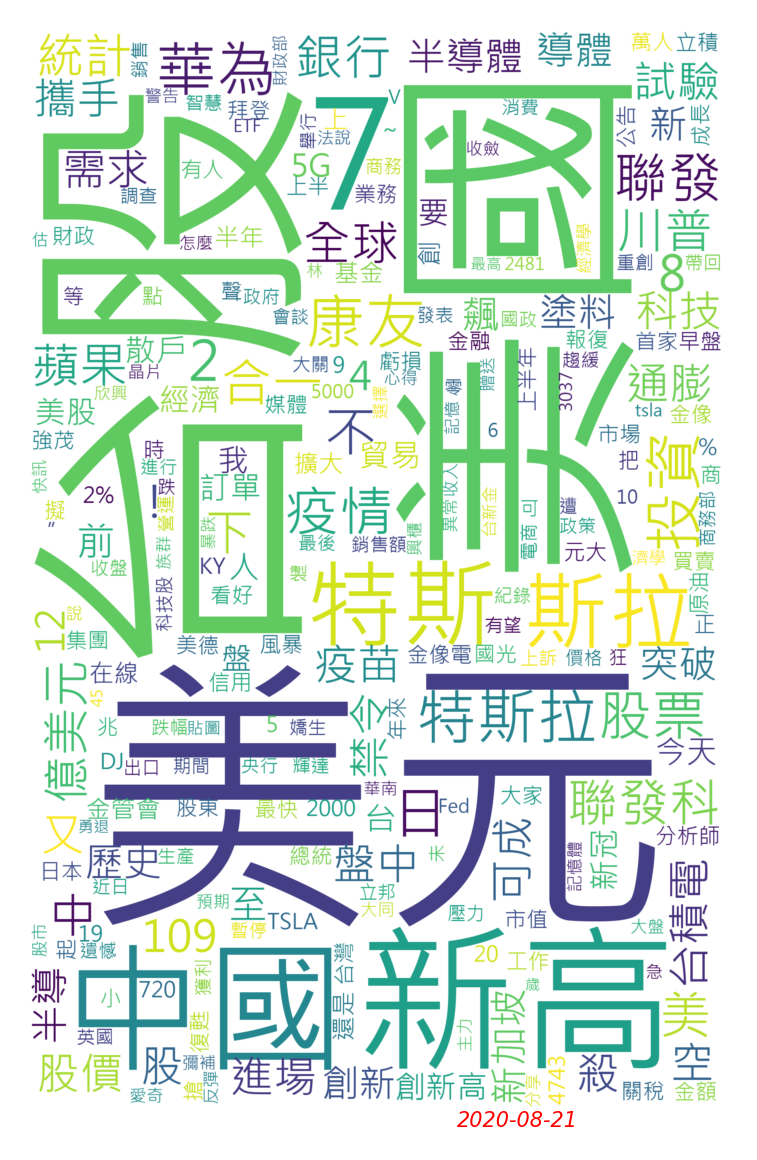

In [332]:
# 使用cut_for_search(搜尋引擎)斷詞模式並產生字詞頻率的dictionary (並剔除stopwords的計算)
Sentence = jieba.cut_for_search(d) 
 
# create a python dictionary
hash = {}
for item in Sentence:
 
    if item in stopwords:
        continue
    
    if item in hash:
        hash[item] += 1
    else:
        hash[item] = 1
mask=np.array(Image.open("手機畫面比例2.png"))
# 文字雲樣式設定
wc = WordCloud(scale=4,
               font_path="C/Windows/Fonts/msjh.ttc", #設置字體
               mask=mask,
               background_color="white", #背景顏色
               max_words = 250,      #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞
 
# 使用dictionary的內容產生文字雲
wc.generate_from_frequencies(hash)
wc
''' 
# 1.圓半徑
r = 1630.0
# 2.圓心座標
a, b = (2020., 2020.)
# 參數方程
theta = np.arange(0, 2*np.pi, 0.01)
x = a + r * np.cos(theta)
y = b + r * np.sin(theta)
'''



# 視覺化呈現
plt.figure(dpi=300)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(3, 4.8)
#plt.figure()
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
# '''
# axes = fig.add_subplot(111)
# axes.plot(x, y, color="red", linewidth=1)  #畫圓
# #畫永字
# ax = plt.gca()
# rect = patches.Rectangle((2190,990),
#                  400,
#                  410,
#                  linewidth=0.5,
#                  edgecolor='red',
#                  facecolor = 'red',
#                  )

# ax.add_patch(rect)

# rect2 = patches.Rectangle((1840,1410),
#                  350,
#                  1420,
#                  linewidth=0.5,
#                  edgecolor='red',
#                  facecolor = 'red',
#                  )

# ax.add_patch(rect2)

# rect3 = patches.Rectangle((860,1410),
#                  980,
#                  345,
#                  linewidth=0.5,
#                  edgecolor='red',
#                  facecolor = 'red',
#                  )

# ax.add_patch(rect3)

# rect4 = patches.Rectangle((780,2120),
#                  680,
#                  345,
#                  linewidth=0.5,
#                  edgecolor='red',
#                  facecolor = 'red',
#                  )

# ax.add_patch(rect4)

# rect5 = patches.Rectangle((1130,2465),
#                  330,
#                  355,
#                  linewidth=0.5,
#                  edgecolor='red',
#                  facecolor = 'red',
#                  )

# ax.add_patch(rect5)

# rect6 = patches.Rectangle((2560,1770),
#                  795,
#                  345,
#                  linewidth=0.5,
#                  edgecolor='red',
#                  facecolor = 'red',
#                  )

# ax.add_patch(rect6)

# rect7 = patches.Rectangle((2560,2100),
#                  340,
#                  725,
#                  linewidth=0.5,
#                  edgecolor='red',
#                  facecolor = 'red',
#                  )

# ax.add_patch(rect7)
# '''

plt.annotate(today, xy=(0, 0), xytext=(1100, 2830),color='r',size=5,style='italic')
fig_name=today+'fig_WCloud.png'  #同一張圖分別存兩個檔
temp1=fig_name #這裡用不到，只是先記錄檔名，後面裁切圖片，需要用來讀取檔案。
plt.savefig(fig_name) #存同一個資料夾
server_file='Y:\\10_LINE訊號發送\\05_新聞文字雲\\'+today+'fig_WCloud.png'
plt.savefig(server_file)  #存部門server
fig_name='fig_WCloud.png'
plt.savefig(fig_name) #本地存一個每天都覆蓋的同檔名，用來上傳給line的後台ftp
plt.show()

In [333]:
import cv2
#刪除白邊
img = cv2.imread(temp1)
print(img.shape)
#img.show()

crop_img = img[160:1280,100:820]  # (left, upper, right, lower)
cv2.imshow("cropped",crop_img)
cv2.imwrite(temp1,crop_img)


img = cv2.imread(fig_name)
print(img.shape)
#img.show()

crop_img = img[160:1280,100:820]  # (left, upper, right, lower)
cv2.imshow("cropped",crop_img)
cv2.imwrite(fig_name,crop_img)



(1440, 900, 3)
(1440, 900, 3)


True

In [334]:
wc.words_.keys()

dict_keys(['台股', '美元', '美國', '新高', '7', '中國', '特斯', '斯拉', '特斯拉', '投資', '康友', '\u3000', '華為', '疫情', '2', '日', '股票', '聯發', '不', '美', '聯發科', '合一', '銀行', '億美元', '川普', '全球', '8', '蘋果', '中', '統計', '下', '股價', '疫苗', '試驗', '又', '通膨', '科技', '台積電', '需求', '空', '進場', '盤中', '殺', '攜手', '禁令', '109', '股', '可成', '!', '至', '前', '半導', '導體', '半導體', '新', '突破', '塗料', '新加坡', '4', '飆', '歷史', '12', '創新', '創新高', '新冠', '我', '美股', '盤', '人', '貿易', '台', '5G', '訂單', '今天', '要', '經濟', '散戶', '金管會', '基金', '上', '擴大', '在線', '創', '還是', '半年', '首家', '市值', '拜登', '看好', '聲', '集團', '媒體', '兆', '財政', '日本', '萬人', '9', '起', '20', '復甦', '分析師', '業務', '成長', '市場', '最快', '關稅', '把', '工作', '等', '2000', '2%', '金像', '金像電', '股東', '金融', '％', '19', '元大', 'TSLA', '虧損', '擬', '4743', '買賣', '強茂', '公告', '大家', '搶', '~', '報復', '風暴', '時', '總統', '信用', '點', 'KY', '美德', '國光', '早盤', '金額', '720', '有人', '原油', '正', '”', '小', '年來', '立積', '台灣', '5', '上半', '上半年', '商', 'DJ', '英國', '銷售', '銷售額', '輝達', '有望', '5000', '國政', '政府', '壓力', '立邦', '6', '嬌生', '最後', '價格', '出口'

In [335]:
keys=list(wc.words_.keys())[0:300]
keys

['台股',
 '美元',
 '美國',
 '新高',
 '7',
 '中國',
 '特斯',
 '斯拉',
 '特斯拉',
 '投資',
 '康友',
 '\u3000',
 '華為',
 '疫情',
 '2',
 '日',
 '股票',
 '聯發',
 '不',
 '美',
 '聯發科',
 '合一',
 '銀行',
 '億美元',
 '川普',
 '全球',
 '8',
 '蘋果',
 '中',
 '統計',
 '下',
 '股價',
 '疫苗',
 '試驗',
 '又',
 '通膨',
 '科技',
 '台積電',
 '需求',
 '空',
 '進場',
 '盤中',
 '殺',
 '攜手',
 '禁令',
 '109',
 '股',
 '可成',
 '!',
 '至',
 '前',
 '半導',
 '導體',
 '半導體',
 '新',
 '突破',
 '塗料',
 '新加坡',
 '4',
 '飆',
 '歷史',
 '12',
 '創新',
 '創新高',
 '新冠',
 '我',
 '美股',
 '盤',
 '人',
 '貿易',
 '台',
 '5G',
 '訂單',
 '今天',
 '要',
 '經濟',
 '散戶',
 '金管會',
 '基金',
 '上',
 '擴大',
 '在線',
 '創',
 '還是',
 '半年',
 '首家',
 '市值',
 '拜登',
 '看好',
 '聲',
 '集團',
 '媒體',
 '兆',
 '財政',
 '日本',
 '萬人',
 '9',
 '起',
 '20',
 '復甦',
 '分析師',
 '業務',
 '成長',
 '市場',
 '最快',
 '關稅',
 '把',
 '工作',
 '等',
 '2000',
 '2%',
 '金像',
 '金像電',
 '股東',
 '金融',
 '％',
 '19',
 '元大',
 'TSLA',
 '虧損',
 '擬',
 '4743',
 '買賣',
 '強茂',
 '公告',
 '大家',
 '搶',
 '~',
 '報復',
 '風暴',
 '時',
 '總統',
 '信用',
 '點',
 'KY',
 '美德',
 '國光',
 '早盤',
 '金額',
 '720',
 '有人',
 '原油',
 '正',
 '”',
 '小',
 '年

In [336]:
#列出出現在熱門字的股票名
stockname= pd.read_csv('TWstock_name_number.csv')
#stockname.columns = ["stock"]
sn=stockname['stock'].tolist()

In [337]:
stockname

,stock
0,1101
1,1102
2,1103
3,1104
4,1108
...,...
3466,皇田
3467,佳龍
3468,世紀鋼
3469,邁達康


In [338]:
retA = [i for i in keys if i in sn]
retA

['聯發',
 '聯發科',
 '合一',
 '台積電',
 '可成',
 '金像電',
 '4743',
 '強茂',
 '立積',
 '大同',
 '台新金',
 '2481',
 '欣興',
 '3037']

In [339]:
#上傳檔案到FTP

import ftplib
import os
ftp = ftplib.FTP("172.17.2.27")          
ftp.login("011531","q8Ws2qTQ")      #ID/PW
#ftp.set_debuglevel(2)


ftp.cwd("News_word_cloud")#上傳檔案的路徑
bufsize=1024
filename = "fig_WCloud.png"#上傳的檔案的名
file_handle=open(filename,"rb")
ftp.storbinary("STOR fig_WCloud.png",file_handle,bufsize)#STOR是上傳的命令
ftp.set_debuglevel(0)
ftp.quit()


ftp = ftplib.FTP("172.17.6.27")          
ftp.login("011531","q8Ws2qTQ")      #ID/PW
#ftp.set_debuglevel(2)


ftp.cwd("News_word_cloud")#上傳檔案的路徑
bufsize=1024
filename = "fig_WCloud.png"#上傳的檔案的名
file_handle=open(filename,"rb")
ftp.storbinary("STOR fig_WCloud.png",file_handle,bufsize)#STOR是上傳的命令
ftp.set_debuglevel(0)
ftp.quit()

'221 Goodbye, closing session.'

In [340]:
#參考finlab，抓股價收盤價
import requests
from io import StringIO
import pandas as pd
import numpy as np
import time
today_str=datetime.datetime.today().strftime("%Y%m%d")


# 下載股價
r = requests.post('https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + today_str + '&type=ALL')

# 整理資料，變成表格
df_fin = pd.read_csv(StringIO(r.text.replace("=", "")), 
            header=["證券代號" in l for l in r.text.split("\n")].index(True)-1)


# 顯示出來
print(datetime.datetime.today())
df_fin.head()

2020-08-21 16:45:14.231391


,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比,Unnamed: 16
0,0050,元大台灣50,"8,132,713","5,138","832,420,919",102.15,103.00,101.70,102.80,+,2.20,102.75,19,102.80,505,0.00,NaN
1,0051,元大中型100,"88,182",69,"3,497,029",39.50,39.92,39.46,39.85,+,1.00,39.81,1,39.85,18,0.00,NaN
2,0052,富邦科技,"388,175",266,"34,090,907",86.70,88.30,86.70,88.05,+,2.00,88.00,9,88.05,9,0.00,NaN
3,0053,元大電子,"45,295",35,"2,199,961",48.46,49.00,48.28,48.98,+,0.98,48.80,2,49.09,15,0.00,NaN
4,0054,元大台商50,"111,000",12,"2,817,090",25.37,25.45,25.33,25.40,+,0.58,25.44,22,26.48,1,0.00,NaN


In [348]:
#查出今日熱門股的股價
df_today=df_fin[df_fin["證券名稱"].isin(retA)]
df_today=df_today[["證券代號","證券名稱","成交股數"]]
df_today2=df_fin[df_fin['證券代號'].isin(retA)]
df_today2=df_today2[["證券代號","證券名稱","成交股數"]]
df_today= pd.concat([df_today,df_today2],axis=0).reset_index(drop=True)

In [349]:
df_today

,證券代號,證券名稱,成交股數
0,1459,聯發,"61,890"
1,2330,台積電,"41,609,467"
2,2368,金像電,"66,865,340"
3,2371,大同,"7,370,054"
4,2454,聯發科,"21,528,784"
5,2474,可成,"20,528,630"
6,2481,強茂,"93,375,212"
7,2887,台新金,"33,815,869"
8,3037,欣興,"132,515,338"
9,4968,立積,"14,005,490"


In [350]:
retA

['聯發',
 '聯發科',
 '合一',
 '台積電',
 '可成',
 '金像電',
 '4743',
 '強茂',
 '立積',
 '大同',
 '台新金',
 '2481',
 '欣興',
 '3037']

In [351]:
list_temp=df_today['證券名稱'].tolist()
list_google=[]
for k in list_temp:
    if k.find("-")>-1: 
        list_google.append(k[:k.find("-")])
    else:
        list_google.append(k)
list_google

['聯發', '台積電', '金像電', '大同', '聯發科', '可成', '強茂', '台新金', '欣興', '立積', '強茂', '欣興']

In [360]:
df_today.sort_values("google trends強度", ascending=False,inplace=True)
df_today=df_today.head(10)
df_today

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,證券代號,證券名稱,成交股數,google trends強度
5,2474,可成,"20,528,630",100
11,3037,欣興,"132,515,338",44
1,2330,台積電,"41,609,467",38
4,2454,聯發科,"21,528,784",30
8,3037,欣興,"132,515,338",28
3,2371,大同,"7,370,054",14
9,4968,立積,"14,005,490",12
10,2481,強茂,"93,375,212",10
6,2481,強茂,"93,375,212",6
7,2887,台新金,"33,815,869",5


In [361]:
#查詢google trends
#參考https://clay-atlas.com/blog/2020/02/11/python-chinese-tutorial-package-pytrends-goolge-trends/
import math
from pytrends.request import TrendReq
from pprint import pprint

g=len(df_today)
h=0
#由於google trends的API，一次只能查5個東西，因此用迴圈。
#先確認共有幾個股票名字，計算要跑幾次迴圈。
for i in range(math.ceil(len(df_today)/5)):
    pytrend = TrendReq(hl='en-US', tz=360)
    if i < math.ceil(len(df_today)/5) and math.ceil(len(df_today)/5)!=1:
        
        keywords = list_google[i*5:(i+1)*5]
        pytrend.build_payload(
              kw_list=keywords,
              cat=0,
              timeframe='today 1-m',
              geo='TW',
              gprop='') 
        for j in range(5):
            df_today.loc[h,"google trends強度"]=pytrend.interest_over_time().iloc[-1,j]
            h=h+1
                
                
    else:
        keywords = list_google[i*5:]
        pytrend.build_payload(
             kw_list=keywords,
             cat=0,
             timeframe='today 1-m',
             geo='TW',
             gprop='')
        for j in range(5):
                df_today.loc[h,"google trends強度"]=pytrend.interest_over_time().iloc[-1,j]
                h=h+1
        

pprint(pytrend.interest_over_time())

             可成  強茂  台新金  欣興  立積  isPartial
date                                       
2020-07-21   14   3    5  21   4      False
2020-07-22   15   2    8  20   4      False
2020-07-23   10   3    5  12   7      False
2020-07-24   12   4    5  10   7      False
2020-07-25    4   0    0   4   4      False
2020-07-26    6   0    6   3   3      False
2020-07-27   18   3    5  18   3      False
2020-07-28    8   1    6  17   8      False
2020-07-29    6   3    4  19   8      False
2020-07-30   14   3   18  20   8      False
2020-07-31    9   3   10  19   8      False
2020-08-01    5   3    1  11   2      False
2020-08-02    6   1    5   5   3      False
2020-08-03   11   1    6  26   7      False
2020-08-04    9   4    7  22   6      False
2020-08-05    9   4    7  39   8      False
2020-08-06    8   9   15  26   7      False
2020-08-07   14   6    6  17   6      False
2020-08-08    4   1    3   4   1      False
2020-08-09    3   6    3  11   2      False
2020-08-10   12   4    6  25   5

In [362]:
df_today.columns=["代號","股名","成交股數","google trends強度"]
df_today

,代號,股名,成交股數,google trends強度
5,2474,可成,"20,528,630",100
11,3037,欣興,"132,515,338",44
1,2330,台積電,"41,609,467",38
4,2454,聯發科,"21,528,784",30
8,3037,欣興,"132,515,338",28
3,2371,大同,"7,370,054",14
9,4968,立積,"14,005,490",11
10,2481,強茂,"93,375,212",10
6,2481,強茂,"93,375,212",6
7,2887,台新金,"33,815,869",5


In [363]:
from openpyxl import Workbook
import openpyxl

#寫到excel


# 開啟工作簿
wb = openpyxl.load_workbook(r"C:\Users\011531\SinoPac\AI投顧 - General\AI幫你顧選股策略及對應資料欄位.xlsx")
# 獲取表單
wb.active =0
ws = wb['話題選股-新聞關鍵字熱門股']
#先把之前的資料清掉
for row in ws['A1:D50']:
     for cell in row:
       cell.value = None
#先填入欄位名稱
ws.cell(column=1, row=1).value = df_today.columns[0]   
ws.cell(column=2, row=1).value = df_today.columns[1]
ws.cell(column=3, row=1).value = df_today.columns[2]
ws.cell(column=4, row=1).value = df_today.columns[3]
#填入資料
for i in range(4):
    for j in range(len(df_today)):
        ws.cell(column=(i+1), row=j+2).value = df_today.iloc[j,i]


wb.save(r"C:\Users\011531\SinoPac\AI投顧 - General\AI幫你顧選股策略及對應資料欄位.xlsx")
print('----------excel saved successfully----------')



----------excel saved successfully----------
